In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alessandropontini","key":"97d4a2f050bffb944afe13160739c4f2"}'}

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [4]:
! kaggle competitions list

ref                                               deadline             category             reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started   Knowledge       2235           False  
titanic                                           2030-01-01 00:00:00  Getting Started   Knowledge      16914            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started   Knowledge       4607           False  
connectx                                          2030-01-01 00:00:00  Getting Started   Knowledge        321           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started       Kudos       3407           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground            Kudos      

In [5]:
! kaggle competitions files titanic

name                   size  creationDate         
---------------------  ----  -------------------  
train.csv              60KB  2018-04-09 05:33:22  
gender_submission.csv   3KB  2018-04-09 05:33:22  
test.csv               28KB  2018-04-09 05:33:22  


In [6]:
! kaggle competitions download titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 4.85MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.3MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 59.9MB/s]


In [0]:
from fastai.tabular import *
from fastai.vision import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [0]:
path = Path("/content")
df_raw = pd.read_csv(path/"train.csv")
df_valid = pd.read_csv(path/"test.csv")

In [22]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df_valid.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df_raw.info()
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [25]:
df_raw.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shutes, Miss. Elizabeth W",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
data1 = df_raw.copy(deep = True)
data_cleaner = [data1, df_valid]

In [0]:
for dataset in data_cleaner:    
  
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [0]:
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

In [29]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 1 
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 

    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    #dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr


In [31]:
print(data1['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Don               1
Lady              1
Ms                1
Name: Title, dtype: int64


In [0]:
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)

In [0]:
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [34]:
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
df_valid.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
314,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,26.2500,S,3,0,Mr
757,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,11.5000,S,1,1,Mr
596,1,2,"Leitch, Miss. Jessie Wills",female,28.0,0,0,33.0000,S,1,1,Miss
551,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,26.0000,S,1,1,Mr
122,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,30.0708,C,2,0,Mr
570,1,2,"Harris, Mr. George",male,62.0,0,0,10.5000,S,1,1,Mr
604,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,26.5500,C,1,1,Mr
629,0,3,"O'Connell, Mr. Patrick D",male,28.0,0,0,7.7333,Q,1,1,Mr
204,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,8.0500,S,1,1,Mr
772,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,10.5000,S,1,1,Mrs


In [35]:
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
   # dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
   # dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [0]:
data1.drop(["Sex","Embarked", "Title","Name"], axis=1, inplace=True)

In [0]:
df_valid.drop(["Sex","Embarked", "Title","Name"], axis=1, inplace=True)

In [42]:
data1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'Sex_Code', 'Embarked_Code', 'Title_Code'],
      dtype='object')

In [0]:
dep_var = "Survived"
cat_names = ["Title_Code", "Embarked_Code", "Sex_Code", "Pclass", 'IsAlone']
cont_names = ['Age','FamilySize', 'Fare','SibSp','Parch']
procs = [FillMissing, Categorify, Normalize]
#valid_idx = range(len(data1)-180, len(data1))

In [0]:
data = TabularDataBunch.from_df(path, data1, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, test_df=df_valid)

In [0]:
data = (TabularList.from_df(data1, path=path, cont_names=cont_names,cat_names=cat_names, procs=procs)
        .split_by_rand_pct(0.2)
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_valid, cont_names=cont_names,cat_names=cat_names,procs=procs))
        .databunch())

In [48]:
print(data.train_ds.cont_names)

['Age', 'FamilySize', 'Fare', 'SibSp', 'Parch']


In [49]:
data.show_batch()

Title_Code,Embarked_Code,Sex_Code,Pclass,IsAlone,Age,FamilySize,Fare,SibSp,Parch,target
4,2,0,1,0,0.4911,1.2724,1.7659,0.4280,1.9561,1
3,1,1,3,0,-0.1196,0.0555,-0.4995,0.4280,-0.4673,0
3,2,1,2,1,-0.1196,-0.5530,-0.6559,-0.4695,-0.4673,0
2,0,0,3,1,-1.1121,-0.5530,-0.5101,-0.4695,-0.4673,1
3,2,1,3,1,-0.1196,-0.5530,0.4843,-0.4695,-0.4673,0


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


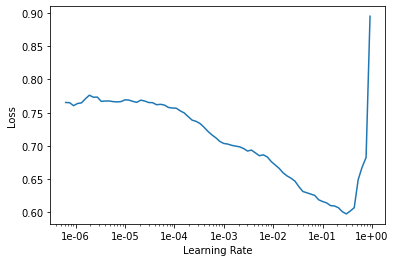

In [51]:
learn.lr_find()
learn.recorder.plot()

In [52]:
lr=1e-02
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.665409,0.639017,0.674157,00:00
1,0.598202,0.553609,0.724719,00:00
2,0.532708,0.507925,0.775281,00:00
3,0.487724,0.514210,0.758427,00:00
4,0.460568,0.515805,0.769663,00:00


In [0]:
learn.save("stage-1")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


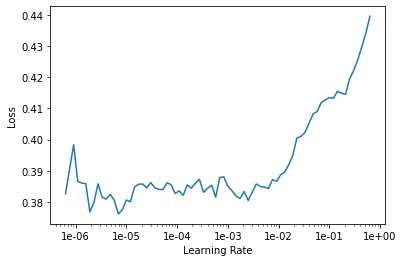

In [54]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [55]:
lr=1e-04/2
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.405694,0.515621,0.769663,00:00
1,0.397246,0.515611,0.769663,00:00
2,0.395379,0.515528,0.769663,00:00
3,0.395859,0.514938,0.769663,00:00
4,0.393741,0.514000,0.769663,00:00
5,0.390726,0.514750,0.769663,00:00
6,0.389193,0.513935,0.769663,00:00
7,0.390251,0.513673,0.769663,00:00
8,0.390924,0.512546,0.769663,00:00
9,0.389068,0.512491,0.769663,00:00


In [0]:
learn.save("stage-2")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


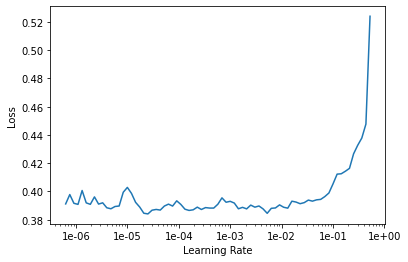

In [57]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-04/2

In [62]:
lr

5e-05

In [63]:
learn.fit_one_cycle(5, slice(lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.379822,0.512906,0.769663,00:00
1,0.381265,0.513728,0.769663,00:00
2,0.379843,0.514208,0.769663,00:00
3,0.385752,0.515512,0.764045,00:00
4,0.388532,0.513306,0.769663,00:00


In [0]:
learn.save('stage-3')

In [65]:
learn.unfreeze()
lr = 1e-6/200
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.391393,0.512989,0.769663,00:00
1,0.390764,0.513093,0.769663,00:00
2,0.391009,0.513357,0.769663,00:00
3,0.394726,0.514631,0.769663,00:00
4,0.389770,0.515426,0.764045,00:00


In [0]:
learn.save("stage-4")

In [67]:
preds = learn.get_preds(ds_type=DatasetType.Test)[1].numpy()
final_df = pd.DataFrame({'ID_code': df_valid['PassengerId'], 'target': preds})
final_df.to_csv('submission.csv', header=True, index=False)